In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast
import os
import sys

from pathlib import Path

lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)

# Append the absolute path to sys.path
sys.path.append(lib_path)

# Now, try importing onedmodel
from onedmodel import *

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [2]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [3]:
# Initialise
nSGD = 10**3
nsamples = 10**3
shuffle = True
batch_size= 20
w0 = 1.8
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
frac_max = 10**-2
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = np.arange(1, 2.5, 0.1)
batch_range = np.arange(5, 80, 5)
lr_range = [0.1, 0.01, 0.001]
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, frac_max=frac_max)

Running experiment 0 over 675
Running experiment 10 over 675
Running experiment 20 over 675
Running experiment 30 over 675
Running experiment 40 over 675
Running experiment 50 over 675
Running experiment 60 over 675
Running experiment 70 over 675
Running experiment 80 over 675
Running experiment 90 over 675
Running experiment 100 over 675
Running experiment 110 over 675
Running experiment 120 over 675
Running experiment 130 over 675
Running experiment 140 over 675
Running experiment 150 over 675
Running experiment 160 over 675
Running experiment 170 over 675
Running experiment 180 over 675
Running experiment 190 over 675
Running experiment 200 over 675
Running experiment 210 over 675
Running experiment 220 over 675
Running experiment 230 over 675
Running experiment 240 over 675
Running experiment 250 over 675
Running experiment 260 over 675
Running experiment 270 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 280 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 290 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Running experiment 300 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 310 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Running experiment 320 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 330 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 340 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Running experiment 350 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 360 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python

Running experiment 370 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Running experiment 380 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 390 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Running experiment 400 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 410 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 420 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 430 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 440 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 450 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmod

Running experiment 460 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 470 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 480 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 490 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 500 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 510 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 520 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 530 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python

Running experiment 540 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 550 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python

Running experiment 560 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python

Running experiment 570 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/

Running experiment 580 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python

Running experiment 590 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Running experiment 600 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df 

Running experiment 610 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Running experiment 620 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/guime/projects/SLTforSGD/code/lib/onedmod

Running experiment 630 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * 

Running experiment 640 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Running experiment 650 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Running experiment 660 over 675


/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:314: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[:itmax])
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * 

Running experiment 670 over 675


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [4]:
df

,escape_rate,lr/B,w0,pvalue,intercept,fraction
0,-0.306873,0.020000,1.0,1.066057e-09,-1.228767,"[0.2447058823529412, 0.2, 0.15529411764705883,..."
1,-0.000023,0.002000,1.0,7.708841e-02,-1.131165,"[0.37415881561238223, 0.3243606998654105, 0.32..."
2,-0.000015,0.000200,1.0,1.005539e-01,-0.906734,"[0.4492462311557789, 0.40100502512562813, 0.40..."
3,-0.210427,0.010000,1.0,2.165326e-16,-1.297120,"[0.2634032634032634, 0.20279720279720279, 0.18..."
4,-0.000114,0.001000,1.0,7.260424e-02,-1.167194,"[0.37257617728531855, 0.31024930747922436, 0.3..."
...,...,...,...,...,...,...
670,-1.057266,0.000143,2.4,3.916646e-02,-2.496306,"[0.0855457227138643, 0.02654867256637168, 0.01..."
671,-0.003246,0.000014,2.4,1.052281e-01,-1.081198,"[0.38, 0.328, 0.328, 0.328, 0.328, 0.328, 0.32..."
672,NaN,0.001333,2.4,NaN,NaN,"[0.02158273381294964, 0.0, 0.0, 0.0, 0.0, 0.0,..."
673,-1.057266,0.000133,2.4,3.916646e-02,-2.496306,"[0.0855457227138643, 0.02654867256637168, 0.01..."


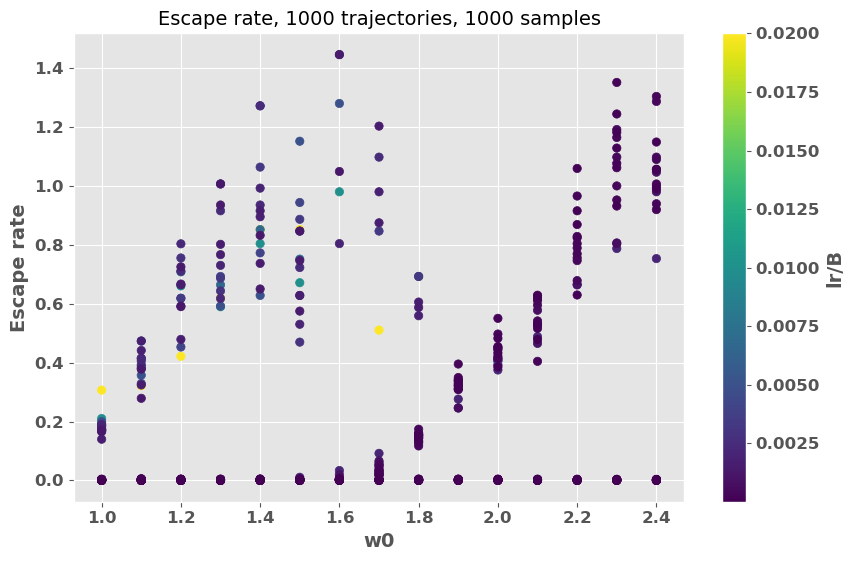

In [5]:
%matplotlib inline
from scipy.interpolate import griddata
cleaned_df = df.copy().dropna()
cleaned_df["escape_rate"] = cleaned_df["escape_rate"].abs()
tmax = len(cleaned_df)
# Define the grid over which we will interpolate
xi = np.linspace(cleaned_df['lr/B'].min(), cleaned_df['lr/B'].max(), tmax)
yi = np.linspace(cleaned_df['w0'].min(), cleaned_df['w0'].max(), tmax)
Xi, Yi = np.meshgrid(xi, yi)

# Create the scatter plot
plt.scatter(cleaned_df['w0'], cleaned_df['escape_rate'], c=cleaned_df['lr/B'], cmap='viridis')

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='lr/B')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('Escape rate')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples')
plt.show()

(array([20.64738454,  0.49454813,  0.12363703,  0.06181852,  0.3709111 ,
         0.92727775,  0.43272962,  0.06181852,  0.12363703,  0.12363703,
         0.24727407,  0.61818517,  0.18545555,  0.49454813,  0.61818517,
         0.3709111 ,  0.49454813,  0.18545555,  0.30909258,  0.24727407,
         0.43272962,  0.7418222 ,  0.3709111 ,  0.55636665,  0.18545555,
         0.3709111 ,  0.3709111 ,  0.55636665,  0.18545555,  0.3709111 ,
         0.24727407,  0.24727407,  0.3709111 ,  0.24727407,  0.43272962,
         0.        ,  0.43272962,  0.30909258,  0.        ,  0.18545555,
         0.12363703,  0.12363703,  0.        ,  0.18545555,  0.12363703,
         0.06181852,  0.06181852,  0.        ,  0.        ,  0.12363703]),
 array([1.53165593e-05, 2.89533899e-02, 5.78914632e-02, 8.68295365e-02,
        1.15767610e-01, 1.44705683e-01, 1.73643757e-01, 2.02581830e-01,
        2.31519903e-01, 2.60457977e-01, 2.89396050e-01, 3.18334123e-01,
        3.47272196e-01, 3.76210270e-01, 4.05148343e-

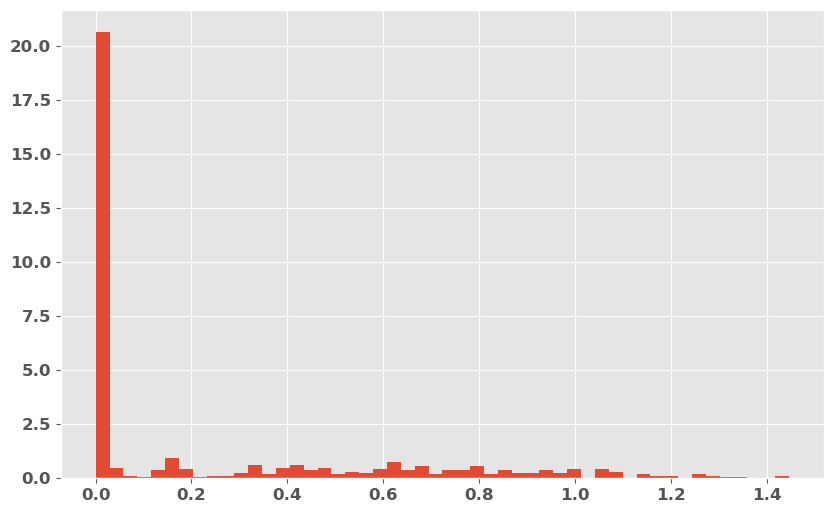

In [6]:
plt.hist(cleaned_df["escape_rate"].to_list(), bins= 50, density=True)

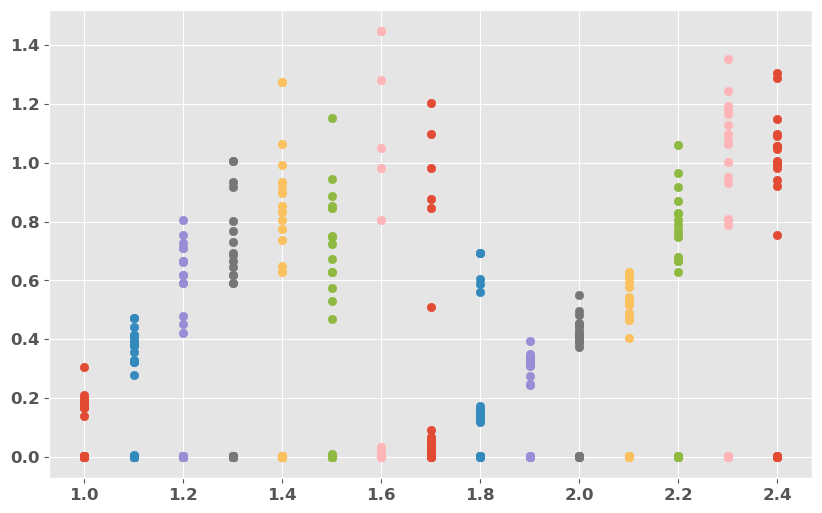

In [7]:
# Plot only by w0
for w0 in w0_range:
    x = cleaned_df["w0"].loc[cleaned_df["w0"]==w0].to_list()
    y = cleaned_df["escape_rate"].loc[cleaned_df["w0"]==w0].to_list()    
    plt.scatter(x, y)
    

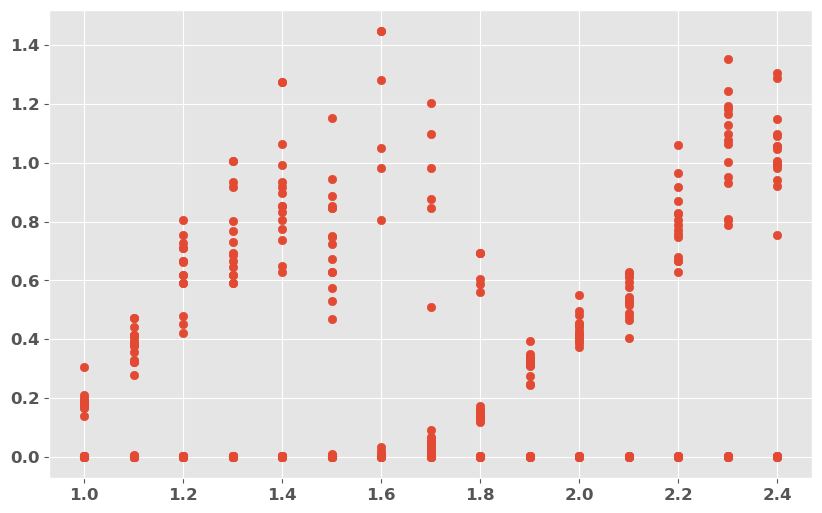

In [8]:
x = cleaned_df["w0"]
y = cleaned_df["escape_rate"]
plt.scatter(x,y)   

In [ ]:
# Contour plot
